In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-exercise-data/megaGymDataset.csv


In [2]:
workouts_data = pd.read_csv('/kaggle/input/gym-exercise-data/megaGymDataset.csv')
workouts_data.columns = workouts_data.columns.str.replace('Unnamed: 0', 'index')
workouts_data

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


# Checking Null values

In [3]:
workouts_data.isnull().sum()

index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [4]:
workouts_data.notnull().sum()

index         2918
Title         2918
Desc          1368
Type          2918
BodyPart      2918
Equipment     2886
Level         2918
Rating        1031
RatingDesc     862
dtype: int64

Ratings is an important parameter for building the workout recommender systems. Filling the Ratings with their respective Level rating averages should give us a decent dataset.

In [5]:
count_exercises = workouts_data.groupby(['BodyPart']).count()
count_exercises


,index,Title,Desc,Type,Equipment,Level,Rating,RatingDesc
BodyPart,,,,,,,,
Abdominals,662,662,298,662,659,662,112,94
Abductors,21,21,8,21,21,21,10,9
Adductors,17,17,7,17,15,17,13,10
Biceps,168,168,101,168,168,168,55,53
Calves,47,47,26,47,44,47,26,26
Chest,262,262,149,262,262,262,113,90
Forearms,31,31,16,31,30,31,24,23
Glutes,81,81,29,81,81,81,25,22
Hamstrings,121,121,50,121,115,121,85,71


In [6]:
workouts_data["Rating"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       0.0
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2913    8.1
2914    8.1
2915    NaN
2916    NaN
2917    NaN
Name: Rating, Length: 2918, dtype: float64>

In [7]:
average_ratings = workouts_data.groupby('Level')['Rating'].mean()
average_ratings

Level
Beginner        5.124183
Expert          8.371429
Intermediate    6.535575
Name: Rating, dtype: float64

In [11]:
average_ratings=round(average_ratings,1)
average_ratings

Level
Beginner        5.1
Expert          8.4
Intermediate    6.5
Name: Rating, dtype: float64

In [12]:
workouts_data['Rating'] = workouts_data.apply(lambda row: average_ratings[row['Level']] if pd.isnull(row['Rating']) else row['Rating'], axis=1)
wo_data=workouts_data
workouts_data.isnull().sum()


index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating           0
RatingDesc    2056
dtype: int64

In [13]:
count_exercises= count_exercises.sort_values(by='index', ascending= False)
fig = px.bar(count_exercises, x=count_exercises.index, y='index', color_discrete_sequence=["Gold"], )
fig.show()

In [14]:
beginner = workouts_data[workouts_data.Level == 'Beginner']
beginner

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
11,11,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average
12,12,Barbell Side Bend,NaN,Strength,Abdominals,Barbell,Beginner,7.0,Average
20,20,Advanced Kettlebell Windmill,NaN,Strength,Abdominals,Kettlebells,Beginner,8.3,Average
22,22,Kettlebell Pass Between The Legs,NaN,Strength,Abdominals,Kettlebells,Beginner,7.3,Average
40,40,Dumbbell spell caster,The dumbbell spell caster is an exercise that ...,Strength,Abdominals,Dumbbell,Beginner,9.3,Average
...,...,...,...,...,...,...,...,...,...
2841,2841,Low Cable Triceps Extension,NaN,Strength,Triceps,Cable,Beginner,8.2,Average
2889,2889,Standing Towel Triceps Extension,NaN,Strength,Triceps,Body Only,Beginner,6.5,Average
2892,2892,Overhead Triceps,NaN,Stretching,Triceps,Body Only,Beginner,3.3,Average
2910,2910,Supine Chest Throw,NaN,Plyometrics,Triceps,Medicine Ball,Beginner,8.2,Average


In [15]:
Intermediate = workouts_data[workouts_data.Level == 'Intermediate']
Intermediate

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,6.5,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,6.5,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,6.5,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,6.5,NaN
...,...,...,...,...,...,...,...,...,...
2912,2912,EZ-Bar Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,Average
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,6.5,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,6.5,NaN


In [17]:
Expert = workouts_data[workouts_data.Level == 'Expert']
Expert

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
61,61,Dumbbell Get-Up Sit-Up,NaN,Strength,Abdominals,Dumbbell,Expert,8.4,NaN
1462,1462,Assisted Single-Arm Pull-Up,NaN,Strength,Lats,Other,Expert,8.4,NaN
1463,1463,Assisted Single-Arm Chin-Up,NaN,Strength,Lats,Other,Expert,8.4,NaN
1802,1802,Power snatch-,The power snatch is a full-body lift in which ...,Olympic Weightlifting,Quadriceps,Barbell,Expert,9.3,Average
1806,1806,Narrow-stance squat,The narrow-stance squat is an exercise that ta...,Strength,Quadriceps,Barbell,Expert,9.0,Average
1812,1812,Barbell forward lunge,The barbell forward lunge is a popular lower-b...,Strength,Quadriceps,Barbell,Expert,8.8,Average
1817,1817,Barbell hack squat,The barbell hack squat is a variety of deadlif...,Strength,Quadriceps,Barbell,Expert,8.5,Average
1829,1829,Single-arm side deadlift,The single-arm side deadlift is a compound exe...,Strength,Quadriceps,Barbell,Expert,7.5,Average
1876,1876,Single-arm kettlebell overhead squat,The single-arm kettlebell overhead squat is a ...,Strength,Quadriceps,Kettlebells,Expert,7.0,Average
2097,2097,Hack Squat - Gethin Variation,The hack squat is a machine-based exercise tha...,Strength,Quadriceps,Machine,Expert,8.4,NaN


In [19]:
body_only =beginner[beginner.Equipment == 'Body Only']
beginner_bodyOnly = body_only.groupby(['BodyPart']).count()
beginner_bodyOnly= beginner_bodyOnly.sort_values(by='index')
fig = px.bar(beginner_bodyOnly, x=beginner_bodyOnly.index, y='index', color ='index')
fig.show()

In [20]:
level_counts=workouts_data.groupby('Level')["index"].count()
fig = px.bar(level_counts, x=level_counts.index, y='index', color_discrete_sequence=["Gold"], labels= 'index', title="Count of Each Level" )
fig.show()

In [21]:
count_type = workouts_data.groupby(['Type']).count()
count_type

,index,Title,Desc,BodyPart,Equipment,Level,Rating,RatingDesc
Type,,,,,,,,
Cardio,35,35,17,35,35,35,35,17
Olympic Weightlifting,35,35,5,35,35,35,35,33
Plyometrics,97,97,53,97,94,97,97,46
Powerlifting,37,37,11,37,37,37,37,35
Strength,2545,2545,1234,2545,2538,2545,2545,594
Stretching,147,147,44,147,125,147,147,117
Strongman,22,22,4,22,22,22,22,20


In [22]:
count_type= count_type.sort_values(by='index', ascending= False)
fig = px.bar(count_type, x=count_type.index, y='index', color_discrete_sequence=["Gold"] )
fig.show()

In [23]:
workouts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2886 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      2918 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

features = ['Type', 'BodyPart', 'Level', 'Rating']
target = 'Title'

In [25]:
workouts_data.isnull().sum()

index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating           0
RatingDesc    2056
dtype: int64

In [26]:
workouts_data['Desc'].fillna('', inplace=True)
workouts_data['Equipment'].fillna('', inplace=True)
workouts_data = workouts_data[features + [target]]

In [27]:
workouts_data

,Type,BodyPart,Level,Rating,Title
0,Strength,Abdominals,Intermediate,0.0,Partner plank band row
1,Strength,Abdominals,Intermediate,6.5,Banded crunch isometric hold
2,Strength,Abdominals,Intermediate,6.5,FYR Banded Plank Jack
3,Strength,Abdominals,Intermediate,6.5,Banded crunch
4,Strength,Abdominals,Intermediate,6.5,Crunch
...,...,...,...,...,...
2913,Strength,Triceps,Intermediate,8.1,EZ-bar skullcrusher-
2914,Strength,Triceps,Beginner,8.1,Lying Close-Grip Barbell Triceps Press To Chin
2915,Strength,Triceps,Intermediate,6.5,EZ-Bar Skullcrusher - Gethin Variation
2916,Strength,Triceps,Intermediate,6.5,TBS Skullcrusher


In [ ]:
"""
X_train, X_test, y_train, y_test = train_test_split(workouts_data[features], workouts_data[target], test_size=0.2, random_state=42)model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')
"""



# Clustering

In [28]:
label_encoder = LabelEncoder()
for feature in ['Type', 'BodyPart', 'Level']:
    workouts_data[feature] = label_encoder.fit_transform(workouts_data[feature])
workouts_data

/tmp/ipykernel_48/3300792022.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_48/3300792022.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_48/3300792022.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Type,BodyPart,Level,Rating,Title
0,4,0,2,0.0,Partner plank band row
1,4,0,2,6.5,Banded crunch isometric hold
2,4,0,2,6.5,FYR Banded Plank Jack
3,4,0,2,6.5,Banded crunch
4,4,0,2,6.5,Crunch
...,...,...,...,...,...
2913,4,16,2,8.1,EZ-bar skullcrusher-
2914,4,16,0,8.1,Lying Close-Grip Barbell Triceps Press To Chin
2915,4,16,2,6.5,EZ-Bar Skullcrusher - Gethin Variation
2916,4,16,2,6.5,TBS Skullcrusher


In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features_for_clustering = ['Type', 'BodyPart', 'Level', 'Rating']

# Extract features for clustering
X_clustering = workouts_data[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_clustering_standardized = scaler.fit_transform(X_clustering)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 6

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
workouts_data['Cluster'] = kmeans.fit_predict(X_clustering_standardized)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/tmp/ipykernel_48/2095656472.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_clustering_standardized, workouts_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5863940649647539


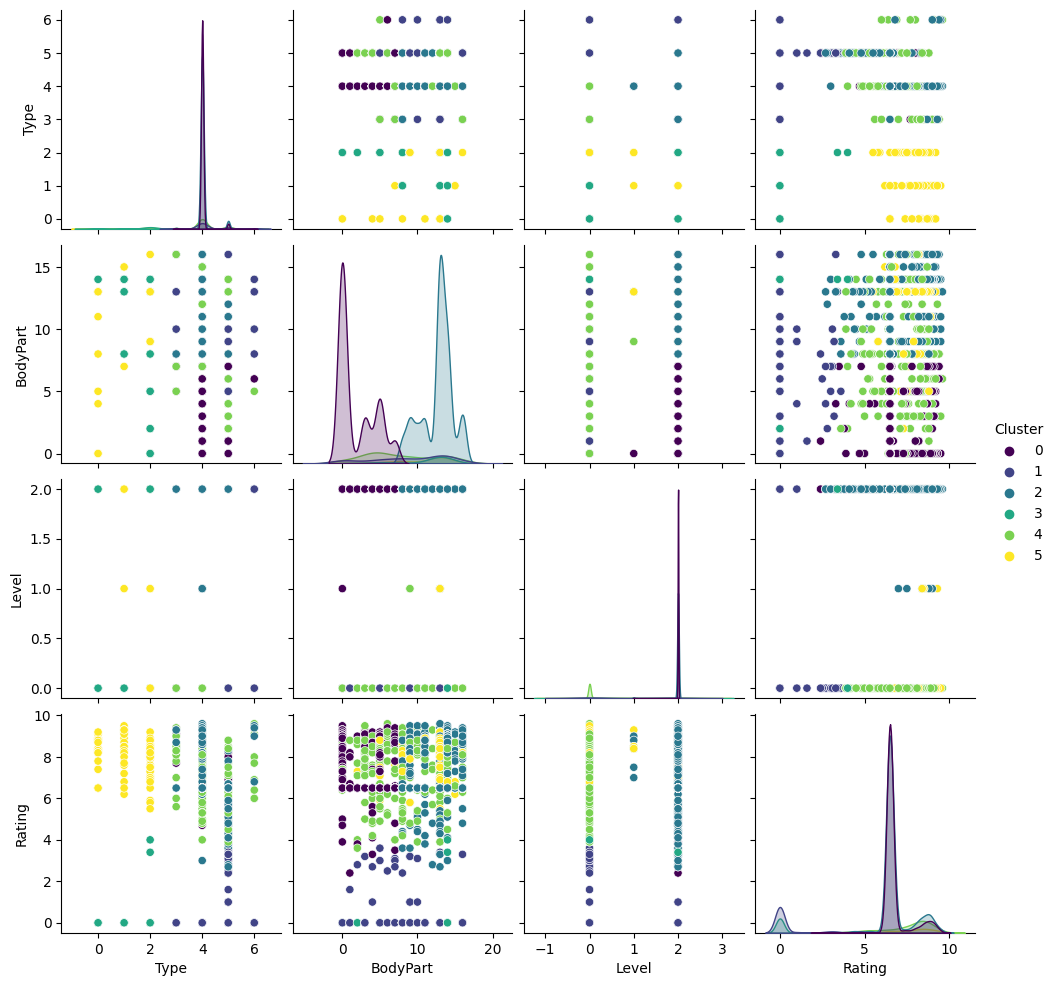

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot based on two features
sns.pairplot(workouts_data, hue='Cluster', vars=features_for_clustering, palette='viridis')
plt.show()

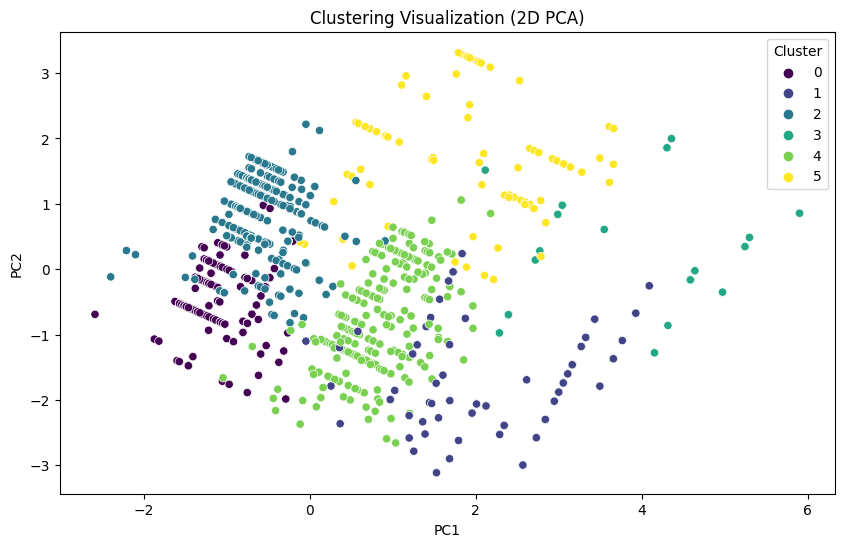

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering_standardized)

# Add the cluster information to the reduced dataset
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = workouts_data['Cluster']

# Visualize clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clustering Visualization (2D PCA)')
plt.show()

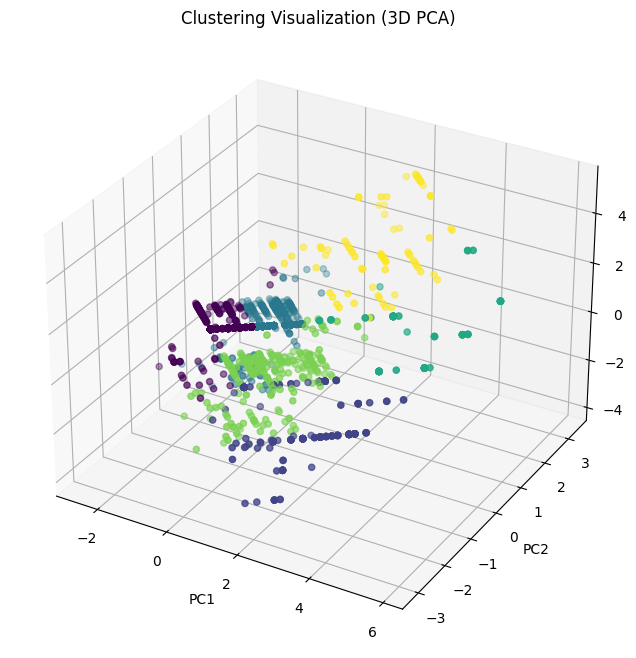

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_clustering_standardized)

# Add the cluster information to the reduced 3D dataset
df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Cluster'] = workouts_data['Cluster']

# Visualize clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['Cluster'], cmap='viridis')
ax.set_title('Clustering Visualization (3D PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# Test Input

In [36]:
user_input = pd.DataFrame([['Strength', 'Abdominals', 'Intermediate', 7.5]],
                           columns=['Type', 'BodyPart', 'Level', 'Rating'])

label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in the new input data
for column in ['Type', 'BodyPart', 'Level']:
    user_input[column] = label_encoder.fit_transform(user_input[column])

# Standardize user input
user_input_standardized = scaler.transform(user_input[features_for_clustering])

# Predict the cluster for the user input
user_cluster = kmeans.predict(user_input_standardized)[0]

# Recommend workouts from the predicted cluster
recommended_workouts = workouts_data[workouts_data['Cluster'] == user_cluster][['Type', 'BodyPart', 'Level', 'Rating', 'Title']]

# Display recommended workouts
print(recommended_workouts)

      Type  BodyPart  Level  Rating                         Title
96       2         0      2     8.6            Sledgehammer swing
149      0         0      2     6.5                   Roc Everest
196      2         0      2     8.8              Mountain climber
248      2         0      2     6.5                  Slalom jumps
349      0         0      2     6.5         HM Running Man Crunch
...    ...       ...    ...     ...                           ...
2424     2        13      2     8.0                Wall ball toss
2449     1        14      2     9.3                Clean and jerk
2464     1        14      2     6.5    Behind-the-head push-press
2757     2        14      0     6.8  Backward Medicine Ball Throw
2910     2        16      0     8.2            Supine Chest Throw

[87 rows x 5 columns]


Retreiving Recommendations

In [37]:
recommended_titles = recommended_workouts['Title'].tolist()

# Retrieve actual values from the original DataFrame based on recommended titles
actual_recommendations = wo_data[wo_data['Title'].isin(recommended_titles)]
actual_recommendations

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
96,96,Sledgehammer swing,The sledgehammer swing is an exercise working ...,Plyometrics,Abdominals,Other,Intermediate,8.6,Average
149,149,Roc Everest,,Cardio,Abdominals,Other,Intermediate,6.5,NaN
196,196,Mountain climber,The mountain climber is a popular bodyweight e...,Plyometrics,Abdominals,Body Only,Intermediate,8.8,Average
248,248,Slalom jumps,The slalom jump is an explosive bodyweight exe...,Plyometrics,Abdominals,Body Only,Intermediate,6.5,NaN
349,349,HM Running Man Crunch,,Cardio,Abdominals,Body Only,Intermediate,6.5,NaN
...,...,...,...,...,...,...,...,...,...
2424,2424,Wall ball toss,The wall ball toss is an explosive full-body e...,Plyometrics,Quadriceps,Exercise Ball,Intermediate,8.0,Average
2449,2449,Clean and jerk,The clean and jerk is a full-body lift that is...,Olympic Weightlifting,Shoulders,Barbell,Intermediate,9.3,Average
2464,2464,Behind-the-head push-press,The behind-the-head push-press is an overhead ...,Olympic Weightlifting,Shoulders,Barbell,Intermediate,6.5,Average
2757,2757,Backward Medicine Ball Throw,,Plyometrics,Shoulders,Medicine Ball,Beginner,6.8,Average
